In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

penguins = pd.read_csv("/Users/amandajotte/Library/CloudStorage/Dropbox/Mac/Documents/Data118Autumn23/penguins_size.csv")
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


How much bigger are male penguins than female penguins?

Let's look at difference in average body mass.

In [3]:
np.mean(penguins.loc[penguins.sex == "MALE","body_mass_g"]) - \
    np.mean(penguins.loc[penguins.sex == "FEMALE","body_mass_g"])

683.4117965367964

This is our point estimate.

Let's find a 95% basic bootstrap confidence interval.

Remember the bootstrap process:
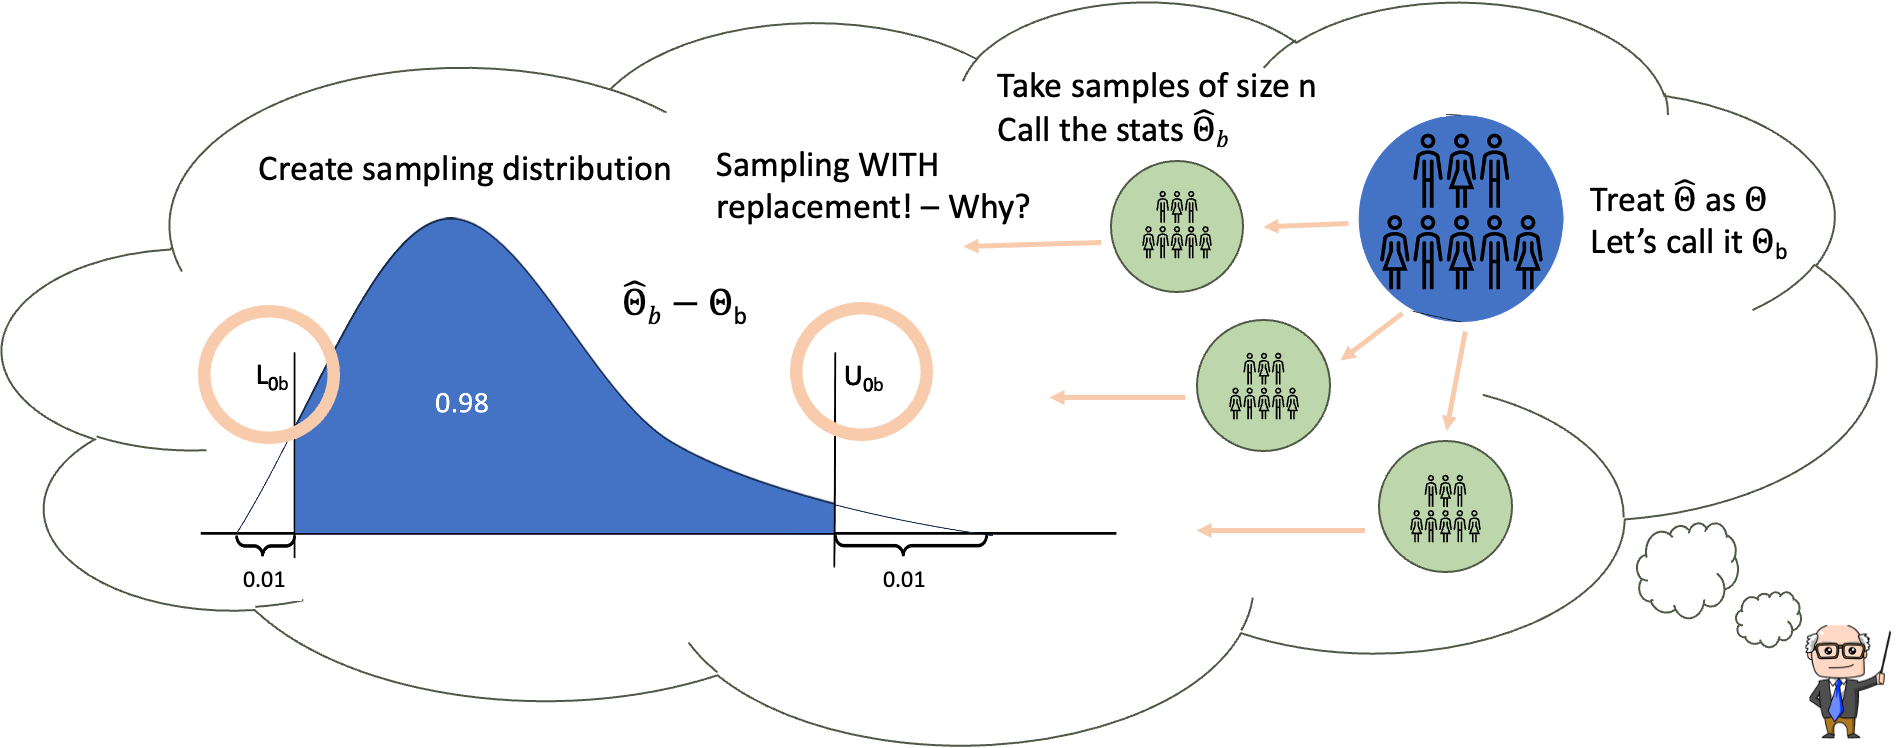

In [4]:
n = penguins.shape[0]

penguin_boot = penguins.sample(n, replace=True)

np.mean(penguin_boot.loc[penguin_boot.sex == "MALE","body_mass_g"]) - \
    np.mean(penguin_boot.loc[penguin_boot.sex == "FEMALE","body_mass_g"])

589.6957926452974

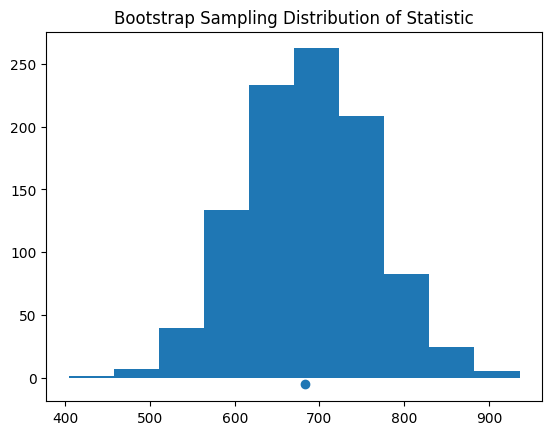

In [5]:
boot_stats = np.array([])

for i in np.arange(1000):
    #get boostrap sample
    penguin_boot = penguins.sample(n, replace=True)

    #calculate statistic on that sample
    stat = np.mean(penguin_boot.loc[penguin_boot.sex == "MALE","body_mass_g"]) - \
                np.mean(penguin_boot.loc[penguin_boot.sex == "FEMALE","body_mass_g"])
    
    #save statistic to make a distribution
    boot_stats = np.append(boot_stats, stat)
    
plt.hist(boot_stats)
plt.scatter(683.41, -5)
plt.title("Bootstrap Sampling Distribution of Statistic")
plt.show()

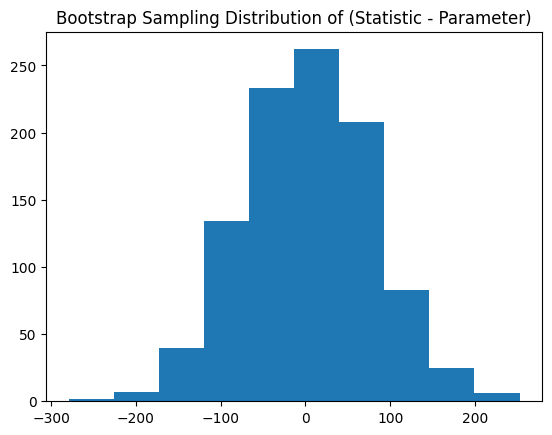

In [6]:
plt.hist(boot_stats - 683.41)
plt.title("Bootstrap Sampling Distribution of (Statistic - Parameter)")
plt.show()

95% confidence interval means we need 5% in the tails of the distribution. Assuming symmetry, we need 2.5% in each tail.

In [7]:
np.quantile(boot_stats - 683.41,0.5)

2.978576986794792

In [8]:
# to make it even more confusing, numpy has a percentile function as well
np.percentile(boot_stats - 683.41,50)

2.978576986794792

In [9]:
pd.DataFrame({'MyData': boot_stats - 683.41}).quantile(0.5)

MyData    2.978577
Name: 0.5, dtype: float64

In [10]:
l = np.percentile(boot_stats - 683.41,2.5)
l

-145.76239605483616

In [11]:
u = np.percentile(boot_stats - 683.41,100-2.5)
u

153.38974568955481

Our bootstrap confidence interval equation: $[\hat{Θ}−𝑈_{0𝑏},\hat{Θ }−L_{0b}]$

In [12]:
print("Our confidence interval lower bound:",683.41 - u)
print("Our confidence interval upper bound:",683.41 - l)

Our confidence interval lower bound: 530.0202543104451
Our confidence interval upper bound: 829.1723960548361
